In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
tit = titanic[['Pclass','Sex','SibSp','Parch','Embarked',"Survived",'Fare']]

In [26]:
tit.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
Survived    0
Fare        0
dtype: int64

In [27]:
tit = tit.dropna(axis=0)

In [28]:
tit.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Survived    0
Fare        0
dtype: int64

In [30]:
tita = tit[['Pclass','Sex','SibSp','Parch','Embarked',"Fare"]]
Y = tit[["Survived"]]

In [31]:
tit.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
tita["Sex"] = tita["Sex"].map({'male':1,'female':0})
tita["Embarked"] = tita["Embarked"].map({'S':2,'C':1,'Q':0})
tita

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,1,1,0,2,7.2500
1,1,0,1,0,1,71.2833
2,3,0,0,0,2,7.9250
3,1,0,1,0,2,53.1000
4,3,1,0,0,2,8.0500
...,...,...,...,...,...,...
886,2,1,0,0,2,13.0000
887,1,0,0,0,2,30.0000
888,3,0,1,2,2,23.4500
889,1,1,0,0,1,30.0000


In [33]:
# # 정규화
# from sklearn.preprocessing import MinMaxScaler

# MM = MinMaxScaler()
# X_mm = MM.fit_transform(tit.Fare)

In [34]:
# 데이터셋 나누기
Xtrain,Xval, Ytrain,Yval = train_test_split(tita, Y, test_size=0.2)

In [35]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [39]:
surv = np.array(['1', '0'])
feature = np.array(['Pclass','Sex','SibSp','Parch','Embarked',"Fare"])

In [40]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file="tree.dot", class_names=surv,\
                feature_names = feature, impurity=True, filled=True)

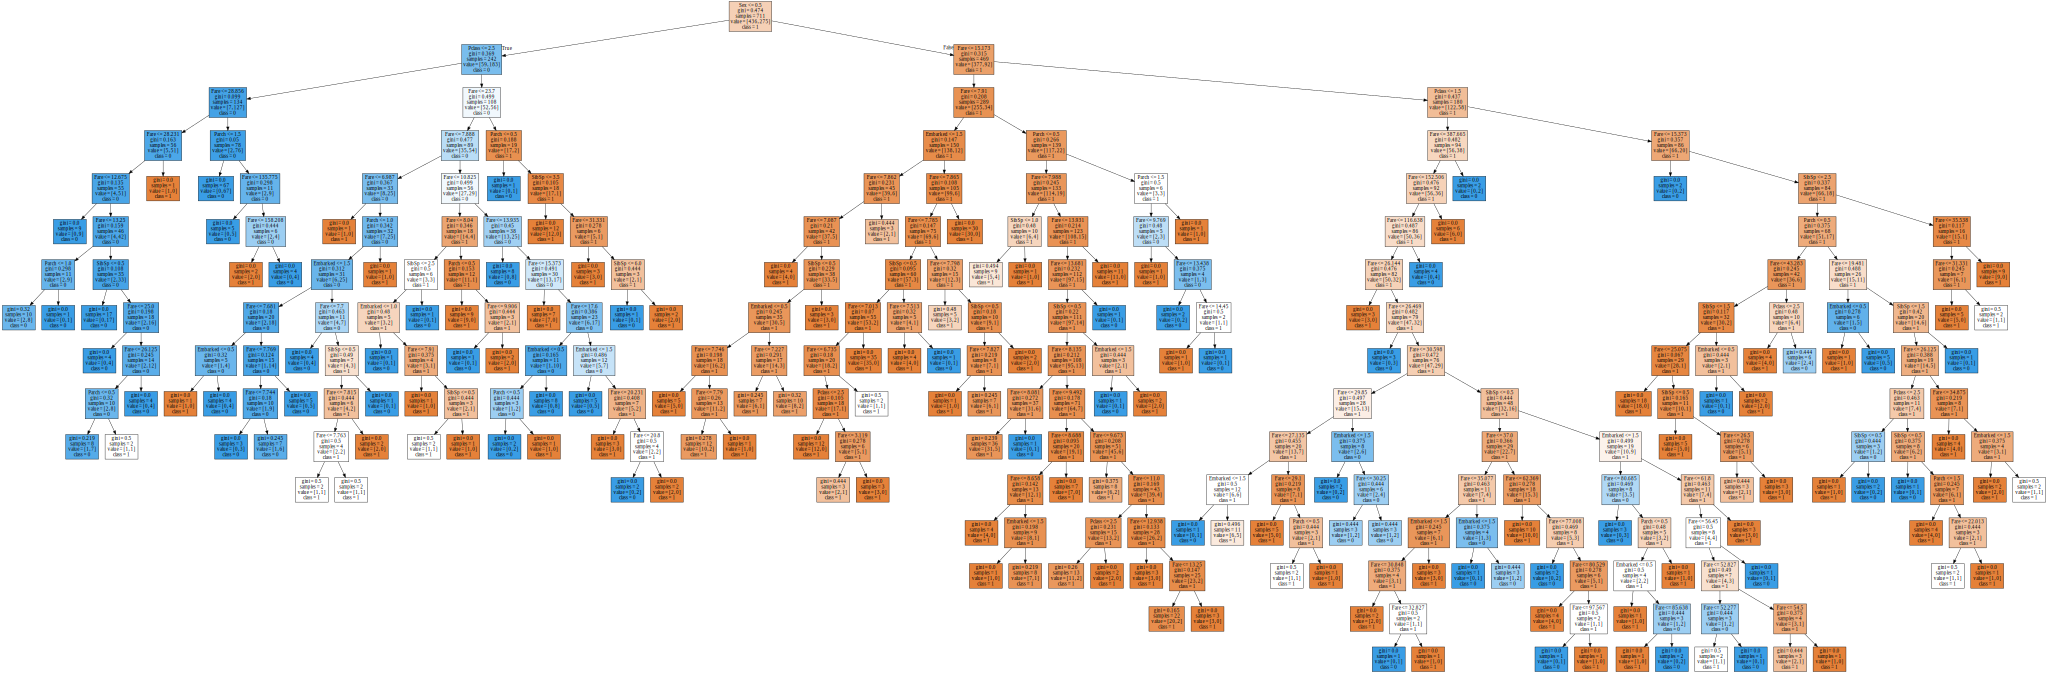

In [41]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)